# Business Objective

- Customer Churn is a big problem for telecommunications companies.Indeed, their annual churn rates are usually higher than 10%. For that reason, they develop strategies to keep as many clients as possible. This is a classification project since the variable to be predicted is binary (churn or loyal customer). The goal here is to model churn probability,conditioned on the customer features.

# Data Set Details

- Each row corresponds to a client of a telecommunications company for whom it has collected information about the type of plan they have contracted, the minutes they have talked, or the charge they pay every month.

# Importing Required Libraries

In [1]:
#Import the libraries
import pandas as pd   
import numpy as np    
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df = pd.read_csv('Churn.csv')
df

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4995              40        no        9.9           5         2.67  ...   
4996               0        no       14.7           2         3.97  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge eve.mins eve.calls  eve.charge  night.mins  \
0           110       45.07    197.4        99       16.78       244.7   
1           123       27.47    195.5       103       16.62       254.4   
2           114       41.38    121.2       110       10.30       162.6   
3            71        50.9     61.9        88        5.26       196.9   
4           113       28.34    148.3       122       12.61       186.9   
...         ...         ...      ...       ...         ...         ...   
4995        127       40.07      223       126       18.96       297.5   
4996         90       31.31    256.8        73       21.83       213.6   
4997         89        23.9    172.8       128       14.69       212.4   
4998         67        32.1    171.7        92       14.59       224.4   
4999        102          22    267.1       104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1     no  
1             103         11.45               1     no  
2             104          7.32               0     no  
3              89          8.86               2     no  
4             121          8.41               3     no  
...           ...           ...             ...    ...  
4995          116         13.39               2     no  
4996          113          9.61               3    yes  
4997           97          9.56               1     no  
4998           89         10.10               0     no  
4999          100          6.97               0     no  

[5000 rows x 21 columns]

In [12]:
df1 = df.replace({'churn':{'yes':1, 'no':0}})

In [13]:
df1

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4995              40        no        9.9           5         2.67  ...   
4996               0        no       14.7           2         3.97  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge eve.mins eve.calls  eve.charge  night.mins  \
0           110       45.07    197.4        99       16.78       244.7   
1           123       27.47    195.5       103       16.62       254.4   
2           114       41.38    121.2       110       10.30       162.6   
3            71        50.9     61.9        88        5.26       196.9   
4           113       28.34    148.3       122       12.61       186.9   
...         ...         ...      ...       ...         ...         ...   
4995        127       40.07      223       126       18.96       297.5   
4996         90       31.31    256.8        73       21.83       213.6   
4997         89        23.9    172.8       128       14.69       212.4   
4998         67        32.1    171.7        92       14.59       224.4   
4999        102          22    267.1       104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1      0  
1             103         11.45               1      0  
2             104          7.32               0      0  
3              89          8.86               2      0  
4             121          8.41               3      0  
...           ...           ...             ...    ...  
4995          116         13.39               2      0  
4996          113          9.61               3      1  
4997           97          9.56               1      0  
4998           89         10.10               0      0  
4999          100          6.97               0      0  

[5000 rows x 21 columns]

In [14]:
# Viewing the data of top 5 rows to look the glimps of the data
df1.head()

Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  day.charge  \
0        no       10.0           3         2.70  ...        110       45.07   
1        no       13.7           3         3.70  ...        123       27.47   
2        no       12.2           5         3.29  ...        114       41.38   
3       yes        6.6           7         1.78  ...         71        50.9   
4       yes       10.1           3         2.73  ...        113       28.34   

  eve.mins eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0    197.4        99       16.78       244.7           91         11.01   
1    195.5       103       16.62       254.4          103         11.45   
2    121.2       110       10.30       162.6          104          7.32   
3     61.9        88        5.26       196.9           89          8.86   
4    148.3       122       12.61       186.9          121          8.41   

   customer.calls  churn  
0               1      0  
1               1      0  
2               0      0  
3               2      0  
4               3      0  

[5 rows x 21 columns]

In [15]:
# View the data of bottom 5 rows to look the glimps of the data
df1.tail()

Unnamed: 0 state      area.code  account.length voice.plan  \
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
4995              40        no        9.9           5         2.67  ...   
4996               0        no       14.7           2         3.97  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge eve.mins eve.calls  eve.charge  night.mins  \
4995        127       40.07      223       126       18.96       297.5   
4996         90       31.31    256.8        73       21.83       213.6   
4997         89        23.9    172.8       128       14.69       212.4   
4998         67        32.1    171.7        92       14.59       224.4   
4999        102          22    267.1       104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
4995          116         13.39               2      0  
4996          113          9.61               3      1  
4997           97          9.56               1      0  
4998           89         10.10               0      0  
4999          100          6.97               0      0  

[5 rows x 21 columns]

In [16]:
# Getting the shape of dataset with rows and columns
df1.shape

(5000, 21)

In [17]:
# Getting all the columns
df1.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

In [18]:
df1.drop(labels= 'Unnamed: 0',, axis=1 , inplace=True)
df1

state      area.code  account.length voice.plan  voice.messages  \
0       KS  area_code_415             128        yes              25   
1       OH  area_code_415             107        yes              26   
2       NJ  area_code_415             137         no               0   
3       OH  area_code_408              84         no               0   
4       OK  area_code_415              75         no               0   
...    ...            ...             ...        ...             ...   
4995    HI  area_code_408              50        yes              40   
4996    WV  area_code_415             152         no               0   
4997    DC  area_code_415              61         no               0   
4998    DC  area_code_510             109         no               0   
4999    VT  area_code_415              86        yes              34   

     intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
0           no       10.0           3         2.70     265.1        110   
1           no       13.7           3         3.70     161.6        123   
2           no       12.2           5         3.29     243.4        114   
3          yes        6.6           7         1.78     299.4         71   
4          yes       10.1           3         2.73     166.7        113   
...        ...        ...         ...          ...       ...        ...   
4995        no        9.9           5         2.67     235.7        127   
4996        no       14.7           2         3.97     184.2         90   
4997        no       13.6           4         3.67     140.6         89   
4998        no        8.5           6         2.30     188.8         67   
4999        no        9.3          16         2.51     129.4        102   

     day.charge eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
0         45.07    197.4         99       16.78       244.7           91   
1         27.47    195.5        103       16.62       254.4          103   
2         41.38    121.2        110       10.30       162.6          104   
3          50.9     61.9         88        5.26       196.9           89   
4         28.34    148.3        122       12.61       186.9          121   
...         ...      ...        ...         ...         ...          ...   
4995      40.07      223        126       18.96       297.5          116   
4996      31.31    256.8         73       21.83       213.6          113   
4997       23.9    172.8        128       14.69       212.4           97   
4998       32.1    171.7         92       14.59       224.4           89   
4999         22    267.1        104       22.70       154.8          100   

      night.charge  customer.calls  churn  
0            11.01               1      0  
1            11.45               1      0  
2             7.32               0      0  
3             8.86               2      0  
4             8.41               3      0  
...            ...             ...    ...  
4995         13.39               2      0  
4996          9.61               3      1  
4997          9.56               1      0  
4998         10.10               0      0  
4999          6.97               0      0  

[5000 rows x 20 columns]

In [19]:
df1.dtypes

state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn               int64
dtype: object

In [20]:
# Check the details about the dataset
df1.info()
# we see that we have 5000 entries and no null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [22]:
df1.nunique()

state               51
area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1961
day.calls          123
day.charge        1962
eve.mins          1877
eve.calls          126
eve.charge        1659
night.mins        1853
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

In [23]:
df2 = df1.copy()
df2["day.charge"] = df2["day.charge"].astype("float64")
df2["eve.mins"] = df2["eve.mins"].astype("float64")

In [24]:
df2.isnull().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [25]:
df2.isnull().sum()/(len(df2))*100

state             0.00
area.code         0.00
account.length    0.00
voice.plan        0.00
voice.messages    0.00
intl.plan         0.00
intl.mins         0.00
intl.calls        0.00
intl.charge       0.00
day.mins          0.00
day.calls         0.00
day.charge        0.14
eve.mins          0.48
eve.calls         0.00
eve.charge        0.00
night.mins        0.00
night.calls       0.00
night.charge      0.00
customer.calls    0.00
churn             0.00
dtype: float64

- From this we can conclude that for day.charge and eve.mins the percentage of missing values are 0.14 and 0.48 respectively.
- These Percentage values are Comparatively low, when compare to other columns in our dataset.

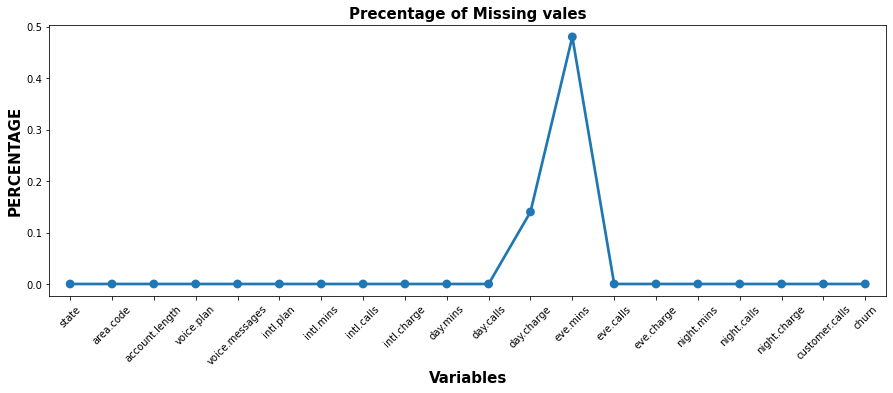

In [26]:
#Floting Graph to see any missing values in data 

missing = pd.DataFrame((df2.isnull().sum())*100/df2.shape[0]).reset_index()
plt.figure(figsize=(15,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation= 45,fontsize=10)
plt.yticks(rotation= 0,fontsize=10)
plt.title("Precentage of Missing vales",fontweight='bold',fontsize=15)
plt.ylabel("PERCENTAGE" ,fontsize=15,fontweight='bold')
plt.xlabel("Variables",fontsize=15,fontweight='bold')
plt.show()

- From this we can conclude that for day.charge and eve.mins the percentage of missing values are 0.14% and 0.48% respectively.
- day.charge and eve.mins are low Percentage of missing values, So we are droping that values.


In [27]:
#Looking for the description of the dataset to get insights of the dataset
df2.describe()

account.length  voice.messages    intl.mins   intl.calls  intl.charge  \
count      5000.00000     5000.000000  5000.000000  5000.000000  5000.000000   
mean        100.25860        7.755200    10.261780     4.435200     2.771196   
std          39.69456       13.546393     2.761396     2.456788     0.745514   
min           1.00000        0.000000     0.000000     0.000000     0.000000   
25%          73.00000        0.000000     8.500000     3.000000     2.300000   
50%         100.00000        0.000000    10.300000     4.000000     2.780000   
75%         127.00000       17.000000    12.000000     6.000000     3.240000   
max         243.00000       52.000000    20.000000    20.000000     5.400000   

          day.mins    day.calls   day.charge     eve.mins    eve.calls  \
count  5000.000000  5000.000000  4993.000000  4976.000000  5000.000000   
mean    180.288900   100.029400    30.653501   200.580326   100.191000   
std      53.894699    19.831197     9.166356    50.554637    19.826496   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     143.700000    87.000000    24.430000   166.275000    87.000000   
50%     180.100000   100.000000    30.620000   201.000000   100.000000   
75%     216.200000   113.000000    36.750000   234.100000   114.000000   
max     351.500000   165.000000    59.760000   363.700000   170.000000   

        eve.charge   night.mins  night.calls  night.charge  customer.calls  \
count  5000.000000  5000.000000  5000.000000   5000.000000     5000.000000   
mean     17.054322   200.391620    99.919200      9.017732        1.570400   
std       4.296843    50.527789    19.958686      2.273763        1.306363   
min       0.000000     0.000000     0.000000      0.000000        0.000000   
25%      14.140000   166.900000    87.000000      7.510000        1.000000   
50%      17.090000   200.400000   100.000000      9.020000        1.000000   
75%      19.900000   234.700000   113.000000     10.560000        2.000000   
max      30.910000   395.000000   175.000000     17.770000        9.000000   

             churn  
count  5000.000000  
mean      0.141400  
std       0.348469  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [29]:
# Printing the count of Yes and No in 'churn' feature
df2.churn.value_counts()

0    4293
1     707
Name: churn, dtype: int64

In [30]:
# Checking Duplicated Rows
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [31]:
# Checking Duplicate Values 
df2.duplicated().sum()

0

# EDA of the Dataset

In [32]:
#Printing the unique value inside 'churn' column
df2['churn'].unique()

array([0, 1], dtype=int64)

In [33]:
#Printing the count of no and yes in 'churn' feature
df2.churn.value_counts()

0    4293
1     707
Name: churn, dtype: int64

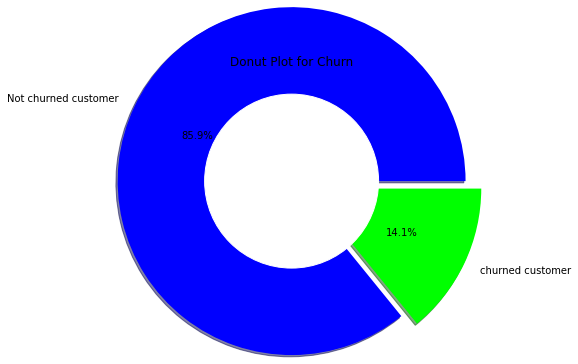

In [34]:
#To get the Donut PLot to analyze churn
data = df2['churn'].value_counts()
explode = (0,0.2)
plt.pie(data, explode,autopct='%1.1f%%',shadow = True,radius= 2.0, labels=['Not churned customer','churned customer'],colors=['blue','lime'])
circle = plt.Circle((0,0), 1, color='White')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Churn')
plt.show()

-From above Donut plot, we can observe that 14.1% of customers are churned and 85.9% customers are not churned.

In [35]:
#Numerical Features
numeric_features = [feature for feature in df1.columns if df1[feature].dtypes != 'O']
print('numeric features:', numeric_features, '\n') 

numeric features: ['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'] 



In [36]:
len(numeric_features)

14

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'account.length'),
  Text(1, 0, 'voice.messages'),
  Text(2, 0, 'intl.mins'),
  Text(3, 0, 'intl.calls'),
  Text(4, 0, 'intl.charge'),
  Text(5, 0, 'day.mins'),
  Text(6, 0, 'day.calls'),
  Text(7, 0, 'eve.calls'),
  Text(8, 0, 'eve.charge'),
  Text(9, 0, 'night.mins'),
  Text(10, 0, 'night.calls'),
  Text(11, 0, 'night.charge'),
  Text(12, 0, 'customer.calls'),
  Text(13, 0, 'churn')])

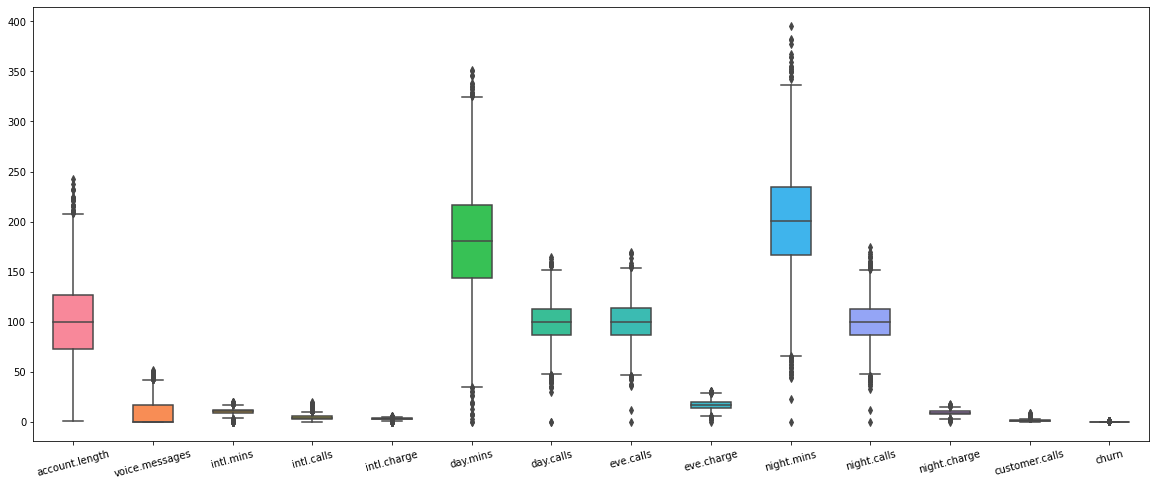

In [37]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df1,orient='V',width=0.5,saturation=2)
plt.xticks(rotation=15,fontsize=10)

Text(0.5, 1.0, 'Countplot for Churn')

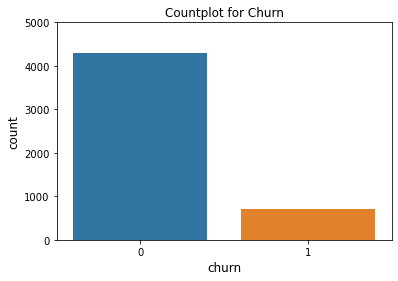

In [38]:
# lets see churn by using countplot
sns.countplot(x=df2.churn)
plt.xlabel("churn",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.ylim(0,5000)
plt.title("Countplot for Churn")

-From the above Count Plot, We can conclude that 4293 customers are not churning and 707 customers are churning.

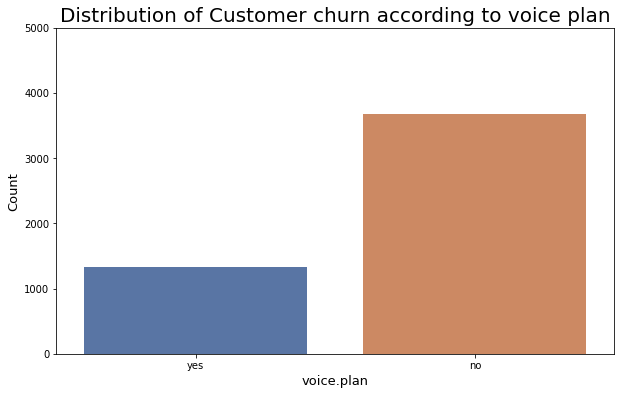

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = df2['voice.plan'],palette='deep')
plt.xlabel('voice.plan', fontsize= 13)
plt.ylabel('Count', fontsize= 13)
plt.ylim(0,5000)
plt.title("Distribution of Customer churn according to voice plan",fontsize= 20)
plt.show()

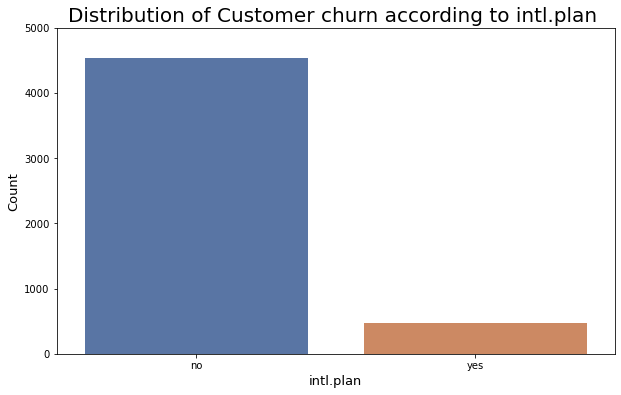

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x = df2['intl.plan'],palette='deep')
plt.xlabel('intl.plan', fontsize= 13)
plt.ylabel('Count', fontsize= 13)
plt.ylim(0,5000)
plt.title("Distribution of Customer churn according to intl.plan ",fontsize=20)
plt.show()

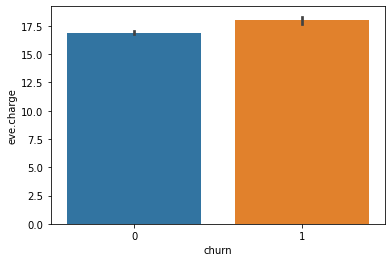

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'churn',y='eve.charge',data = df2)
plt.show()

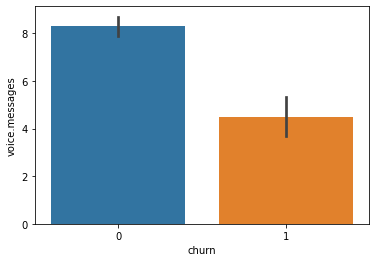

In [41]:
sns.barplot(x= "churn" , y="voice.messages", data = df2)
plt.show()

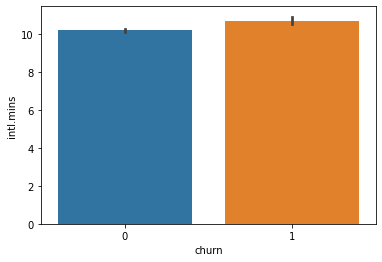

In [42]:
sns.barplot(x = 'churn' , y ='intl.mins', data = df2)
plt.show()

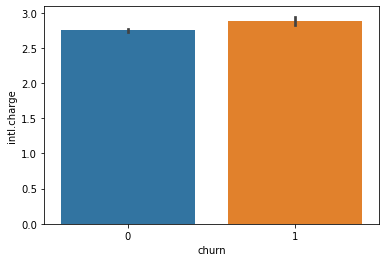

In [43]:
sns.barplot(x = 'churn', y= 'intl.charge',data = df2)
plt.show()

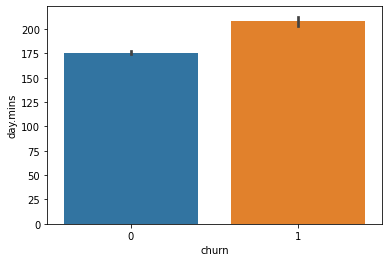

In [44]:
sns.barplot(x = 'churn',y='day.mins',data = df2)
plt.show()

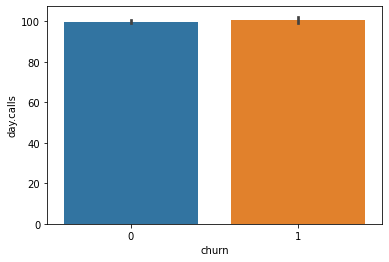

In [45]:
sns.barplot(x = 'churn',y='day.calls',data = df2)
plt.show()

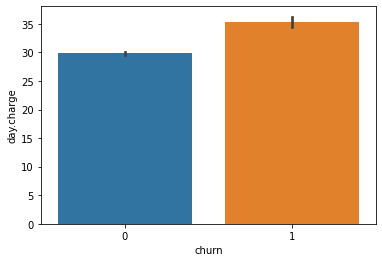

In [46]:
sns.barplot(x = 'churn',y='day.charge',data = df2)
plt.show()

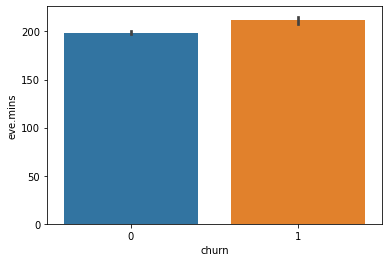

In [47]:
sns.barplot(x = 'churn',y='eve.mins',data = df2)
plt.show()

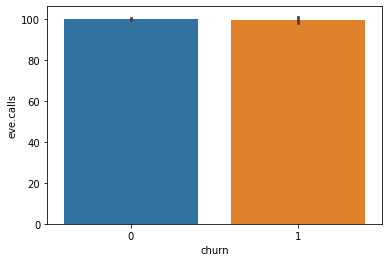

In [48]:
sns.barplot(x = 'churn',y='eve.calls',data = df2)
plt.show()

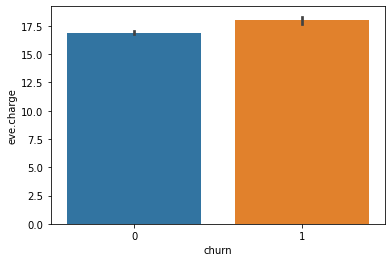

In [49]:
sns.barplot(x = 'churn',y='eve.charge',data = df2)
plt.show()

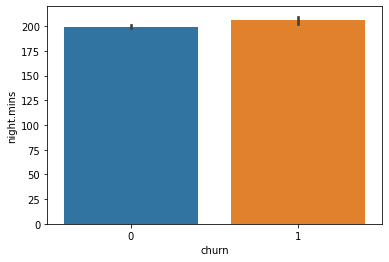

In [50]:
sns.barplot(x = 'churn',y='night.mins',data = df2)
plt.show()

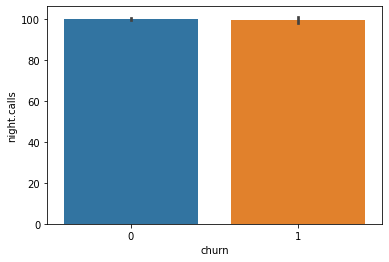

In [51]:
sns.barplot(x = 'churn',y='night.calls',data = df2)
plt.show()

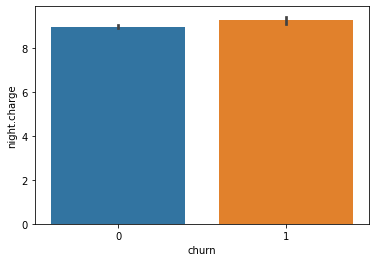

In [52]:
sns.barplot(x = 'churn',y='night.charge',data = df2)
plt.show()

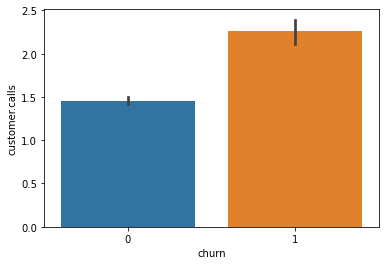

In [53]:
sns.barplot(x = 'churn',y='customer.calls',data = df2)
plt.show()

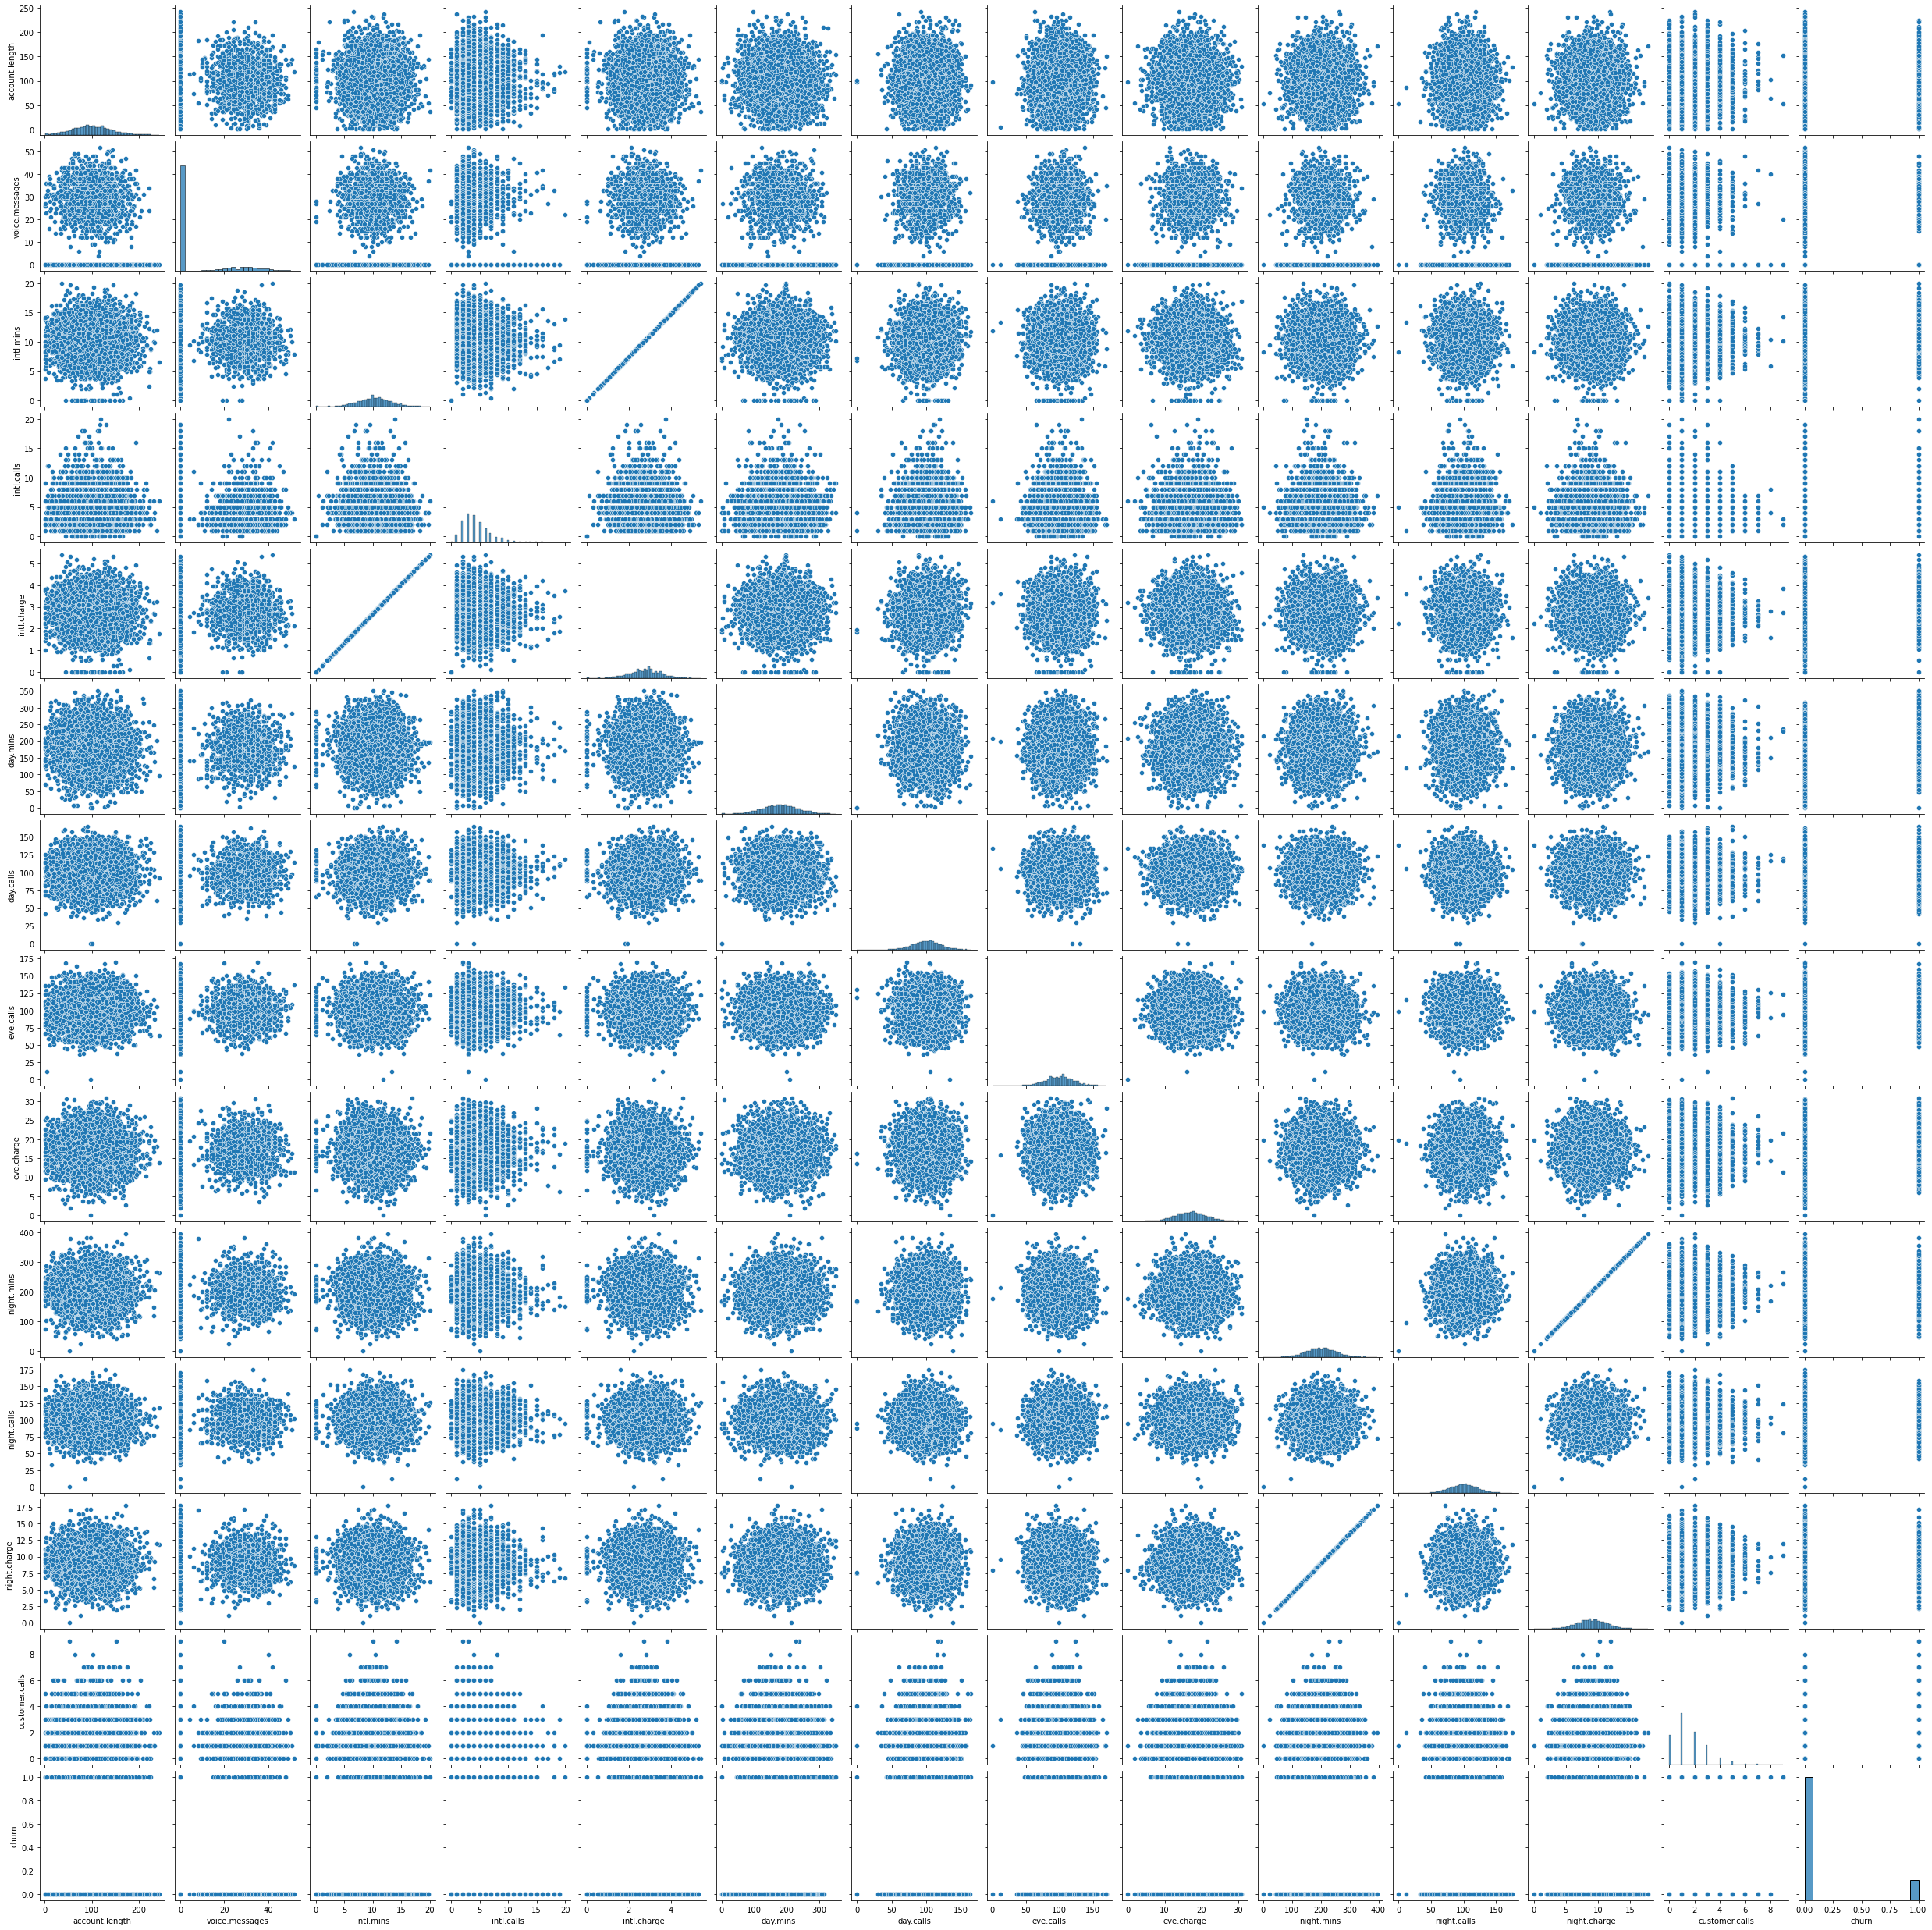

In [56]:
sns.pairplot(df1)
plt.show()

- Int.mins and Int.charges
- Day.mins and Day.charges
- Eve.mins and Eve.charges
- Night.mins and Night.charges
- All the above four Graphs are Linearly related.

In [57]:
X = ['account.length','voice.messages','intl.mins','intl.calls','intl.charge','day.mins','day.calls','day.charge','eve.mins','eve.calls','eve.charge','night.mins','night.calls','night.charge','customer.calls']
X

['account.length',
 'voice.messages',
 'intl.mins',
 'intl.calls',
 'intl.charge',
 'day.mins',
 'day.calls',
 'day.charge',
 'eve.mins',
 'eve.calls',
 'eve.charge',
 'night.mins',
 'night.calls',
 'night.charge',
 'customer.calls']

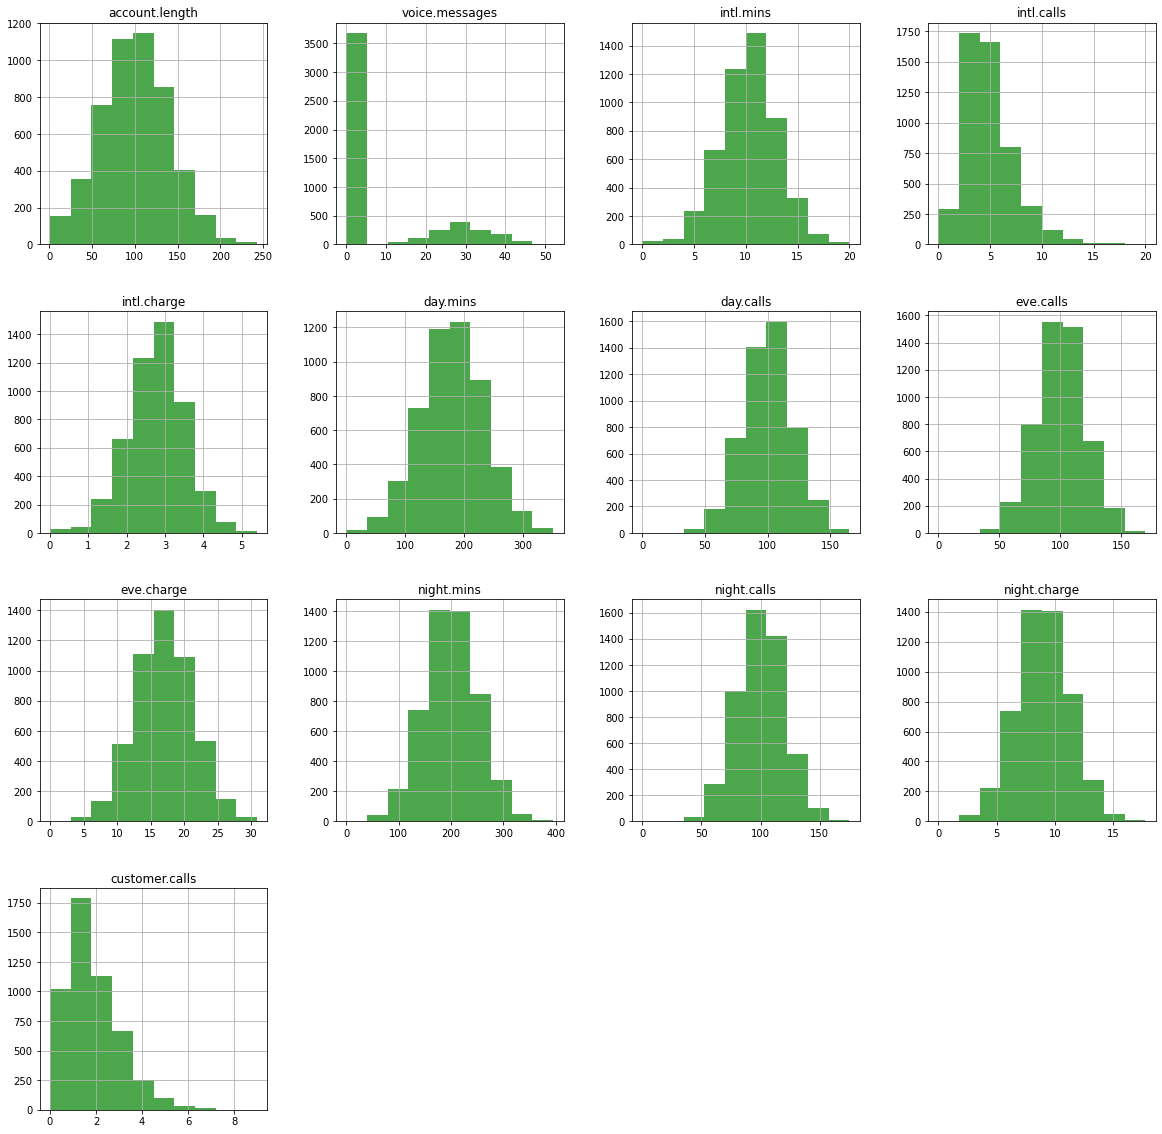

In [58]:
df1[X].hist(figsize=(20,20),color='g',alpha = 0.7)
       
plt.show()

- Most of the data is normally distibuted
- Most of the observations are lying at the centre

# Analyzing State Columns

In [59]:
#Printing the unique value of the state column
df2['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [60]:
df2['state'].nunique()

51

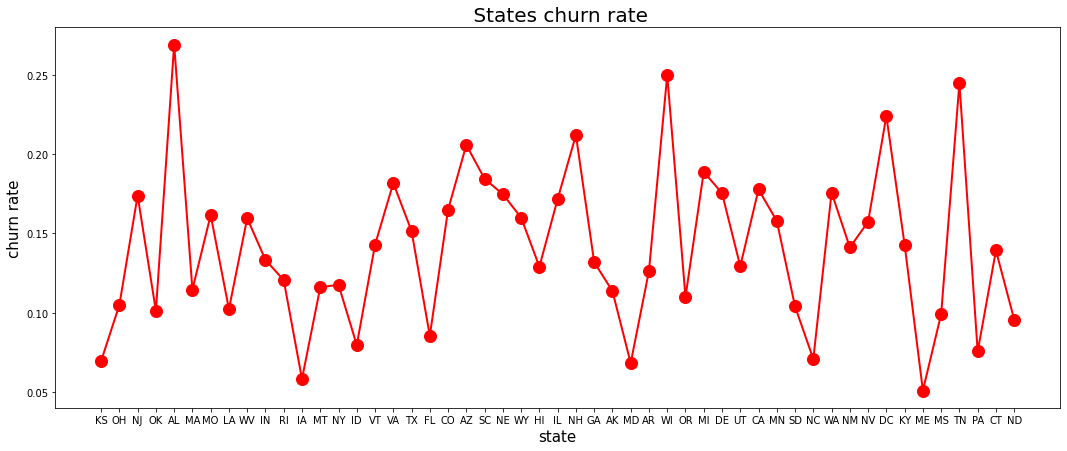

In [ ]:
s1=df2['state'].unique()
s2=df2.groupby(['state'])['churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(s1, s2, color='r', marker ='o', linewidth=2, markersize=12)

plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15) 
plt.show()

-The customers in the AL State are churning more.

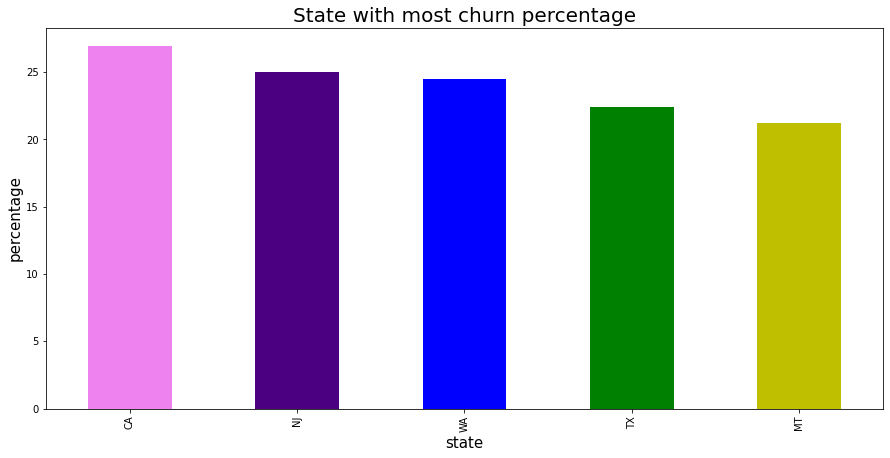

In [62]:
plt.rcParams['figure.figsize'] = (15,7)
color= plt.cm.copper(np.linspace (0, 0.5, 20))
((df2.groupby(['state'])['churn'].mean())*100).sort_values(ascending = False).head(5).plot.bar(color = ['violet', 'indigo','b','g','y','orange','r'])
plt.title("State with most churn percentage", fontsize = 20)

plt.xlabel('state', fontsize = 15)

plt.ylabel('percentage', fontsize = 15)
plt.show()

In [63]:
# Show the most churn of Top 10 by ascending the above list
df2.groupby(["state"])["churn"].mean().sort_values(ascending =False).head(5)

state
CA    0.269231
NJ    0.250000
WA    0.244898
TX    0.224138
MT    0.212121
Name: churn, dtype: float64

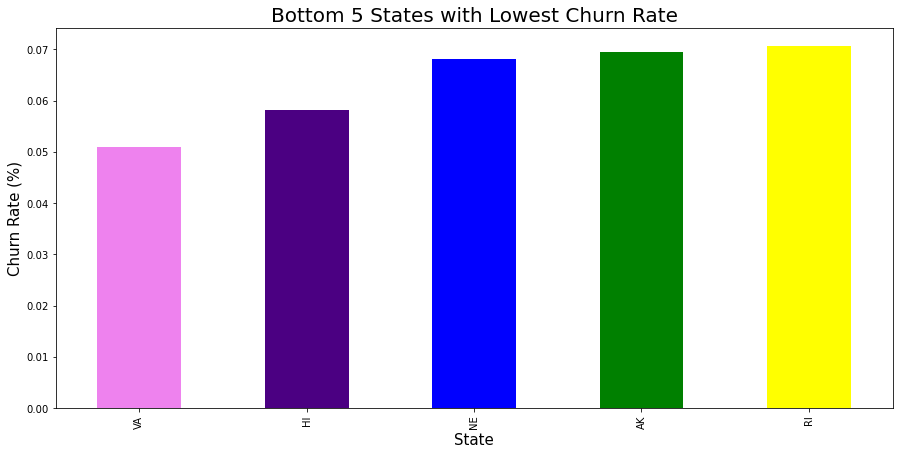

In [64]:
plt.rcParams['figure.figsize'] = (15, 7)
color= plt.cm.copper(np.linspace (0, 0.5, 20))

# Group the data by state and calculate the mean churn rate, then sort the values in ascending order and get the bottom 5 
bottom_states = df2.groupby('state')['churn'].mean().sort_values().head(5)

# Plot a bar chart for the bottom 5 states
ax = bottom_states.plot(kind='bar', color=['violet', 'indigo', 'blue', 'green', 'yellow'])
ax.set_title("Bottom 5 States with Lowest Churn Rate", fontsize=20)
ax.set_xlabel('State', fontsize=15)
ax.set_ylabel('Churn Rate (%)', fontsize=15)
plt.show()
plt.show()

In [65]:
df2.groupby(["state"])['churn'].mean().sort_values(ascending = False).tail(5)


state
RI    0.070707
AK    0.069444
NE    0.068182
HI    0.058140
VA    0.050847
Name: churn, dtype: float64

In [66]:
# Calculate State Vs Churn percentage
State_df = pd.crosstab(df2["state"], df2["churn"]) 
State_df['Percentage_Churn'] = State_df.apply(lambda x : x[1]*100/(x[0]+x[1]), axis = 1)
print(State_df)

churn    0   1  Percentage_Churn
state                           
AK      67   5          6.944444
AL     111  13         10.483871
AR      76  16         17.391304
AZ      80   9         10.112360
CA      38  14         26.923077
CO      85  11         11.458333
CT      83  16         16.161616
DC      79   9         10.227273
DE      79  15         15.957447
FL      78  12         13.333333
GA      73  10         12.048193
HI      81   5          5.813953
IA      61   8         11.594203
ID     105  14         11.764706
IL      81   7          7.954545
IN      84  14         14.285714
KS      81  18         18.181818
KY      84  15         15.151515
LA      75   7          8.536585
MA      86  17         16.504854
MD      81  21         20.588235
ME      84  19         18.446602
MI      85  18         17.475728
MN     105  20         16.000000
MO      81  12         12.903226
MS      82  17         17.171717
MT      78  21         21.212121
NC      79  12         13.186813
ND      78

In [67]:
# Show the most churn state of top 10 by ascending the above list
df1.groupby(["state"])['churn'].mean().sort_values(ascending = False).head(10)

state
CA    0.269231
NJ    0.250000
WA    0.244898
TX    0.224138
MT    0.212121
MD    0.205882
NV    0.188889
ME    0.184466
KS    0.181818
OK    0.177778
Name: churn, dtype: float64

# Analyzing "Area Code" column

In [68]:
# Calculate Area code vs churn percentage
Area_code_data = pd.crosstab(df['area.code'],df['churn'])
Area_code_data['Percentage_churn'] = Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

churn            no  yes  Percentage_churn
area.code                                 
area_code_408  1082  177         14.058777
area_code_415  2149  346         13.867735
area_code_510  1062  184         14.767255


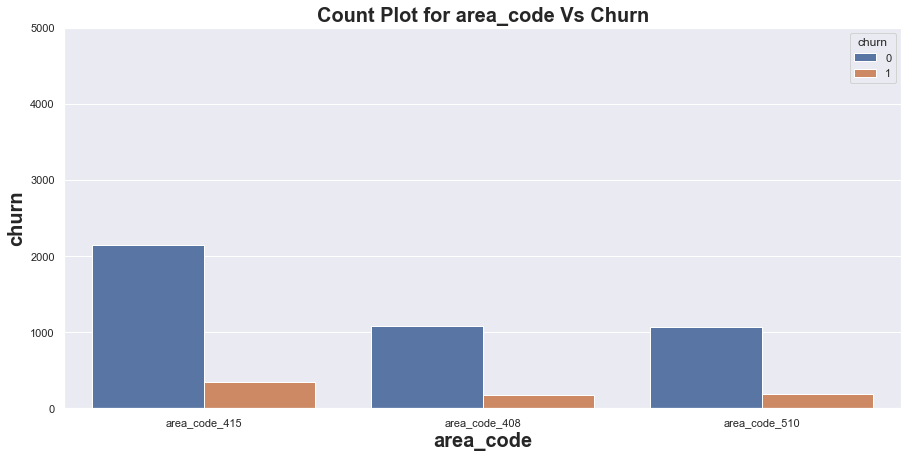

In [69]:
sns.set(style="darkgrid")
ax = sns.countplot(x='area.code', hue="churn", data= df2)
plt.xlabel("area_code",fontweight='bold',fontsize=20)
plt.ylabel("churn",fontweight="bold",fontsize=20)
plt.title("Count Plot for area_code Vs Churn",fontweight='bold',fontsize=20)
plt.ylim(0,5000)
plt.show()

-In the above data, we notice that there is only 2 unique value are there i.e 408 and 510 and the churn rate of these area codes are almost same.
We don't think there is any kind of relation present between the "area.code" and "churn" due to which the customer leaves the operator.

# Analyzing "Account Length" column

In [70]:
#Separating churn and non churn customers
churn_df = df2[df2['churn'] == bool(True)]
not_churn_df = df2[df2['churn'] == bool(False)]

In [71]:
churn_df

state      area.code  account.length voice.plan  voice.messages  \
10      IN  area_code_415              65         no               0   
15      NY  area_code_415             161         no               0   
21      CO  area_code_408              77         no               0   
33      AZ  area_code_408              12         no               0   
41      MD  area_code_408             135        yes              41   
...    ...            ...             ...        ...             ...   
4959    NM  area_code_408             137         no               0   
4980    WA  area_code_408              73         no               0   
4990    ND  area_code_510             140         no               0   
4991    AZ  area_code_510              97         no               0   
4996    WV  area_code_415             152         no               0   

     intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
10          no       12.7           6         3.43     129.1        137   
15          no        5.4           9         1.46     332.9         67   
21          no        5.7           6         1.54      62.4         89   
33          no       11.8           3         3.19     249.6        118   
41         yes       14.6          15         3.94     173.1         85   
...        ...        ...         ...          ...       ...        ...   
4959       yes       10.6           2         2.86     312.4        110   
4980        no       12.3           2         3.32     177.2        118   
4990        no        7.5           6         2.03     244.7        115   
4991        no        8.8           5         2.38     252.6         89   
4996        no       14.7           2         3.97     184.2         90   

      day.charge  eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
10         21.95     228.5         83       19.42       208.8          111   
15         56.59     317.8         97       27.01       160.6          128   
21         10.61     169.9        121       14.44       209.6           64   
33         42.43     252.4        119       21.45       280.2           90   
41         29.43     203.9        107       17.33       122.2           78   
...          ...       ...        ...         ...         ...          ...   
4959       53.11     231.1         73       19.64       120.1           78   
4980       30.12     270.5         84       22.99       241.8          112   
4990       41.60     258.6        101       21.98       231.3          112   
4991       42.94     340.3         91       28.93       256.5           67   
4996       31.31     256.8         73       21.83       213.6          113   

      night.charge  customer.calls  churn  
10            9.40               4      1  
15            7.23               4      1  
21            9.43               5      1  
33           12.61               1      1  
41            5.50               0      1  
...            ...             ...    ...  
4959          5.40               1      1  
4980         10.88               3      1  
4990         10.41               1      1  
4991         11.54               1      1  
4996          9.61               3      1  

[707 rows x 20 columns]

In [72]:
not_churn_df

state      area.code  account.length voice.plan  voice.messages  \
0       KS  area_code_415             128        yes              25   
1       OH  area_code_415             107        yes              26   
2       NJ  area_code_415             137         no               0   
3       OH  area_code_408              84         no               0   
4       OK  area_code_415              75         no               0   
...    ...            ...             ...        ...             ...   
4994    NC  area_code_408              75         no               0   
4995    HI  area_code_408              50        yes              40   
4997    DC  area_code_415              61         no               0   
4998    DC  area_code_510             109         no               0   
4999    VT  area_code_415              86        yes              34   

     intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
0           no       10.0           3         2.70     265.1        110   
1           no       13.7           3         3.70     161.6        123   
2           no       12.2           5         3.29     243.4        114   
3          yes        6.6           7         1.78     299.4         71   
4          yes       10.1           3         2.73     166.7        113   
...        ...        ...         ...          ...       ...        ...   
4994        no        6.9           7         1.86     170.7        101   
4995        no        9.9           5         2.67     235.7        127   
4997        no       13.6           4         3.67     140.6         89   
4998        no        8.5           6         2.30     188.8         67   
4999        no        9.3          16         2.51     129.4        102   

      day.charge  eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4994       29.02     193.1        126       16.41       129.1          104   
4995       40.07     223.0        126       18.96       297.5          116   
4997       23.90     172.8        128       14.69       212.4           97   
4998       32.10     171.7         92       14.59       224.4           89   
4999       22.00     267.1        104       22.70       154.8          100   

      night.charge  customer.calls  churn  
0            11.01               1      0  
1            11.45               1      0  
2             7.32               0      0  
3             8.86               2      0  
4             8.41               3      0  
...            ...             ...    ...  
4994          5.81               1      0  
4995         13.39               2      0  
4997          9.56               1      0  
4998         10.10               0      0  
4999          6.97               0      0  

[4293 rows x 20 columns]

In [73]:
#Account length vs churn
#sns.distplot(df1['account.length'])

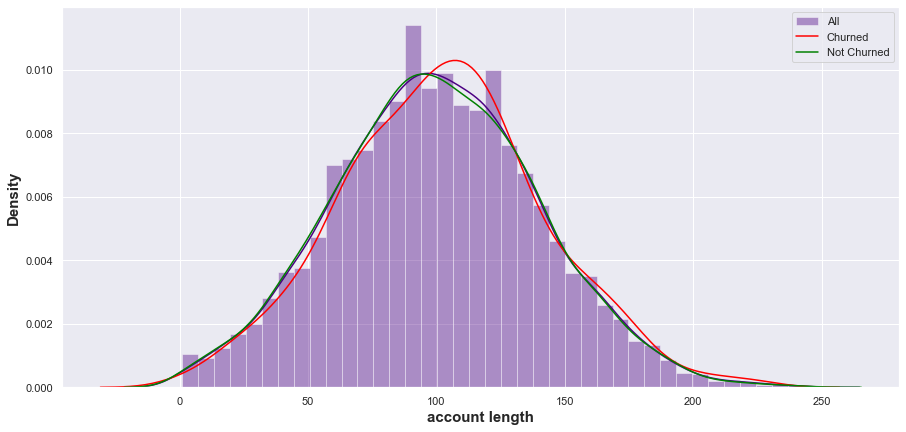

In [74]:
#Comparison of churned account length and not churned account length
sns.distplot(df2['account.length'], color = 'indigo', label='All')
sns.distplot(churn_df['account.length'], color = 'red',hist=False, label='Churned')
sns.distplot(not_churn_df['account.length'], color = 'green',hist=False, label='Not Churned')
plt.xlabel('account length',fontweight='bold',fontsize=15)
plt.ylabel('Density',fontweight='bold',fontsize=15)
plt.legend()

After analyzing various aspects of the 'account.length' column we didn't found any useful relation to churn.So we aren't able to build any connection to the churn as of now. Let's see what other features say about the churn.

# Analyzing "International plan" column

In [75]:
# Show count value of 'yes','no'
df2['intl.plan'].value_counts()

no     4527
yes     473
Name: intl.plan, dtype: int64

In [76]:
#Show the unique data of "International plan"
df2["intl.plan"].unique()

array(['no', 'yes'], dtype=object)

In [77]:
#Calculate the international plan vs churn percentage
International_plan_data = pd.crosstab(df2['intl.plan'],df2['churn'])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

churn         0    1  Percentage Churn
intl.plan                             
no         4019  508         11.221560
yes         274  199         42.071882


Text(0.5, 1.0, 'Count Plot for intl.plan Vs Churn')

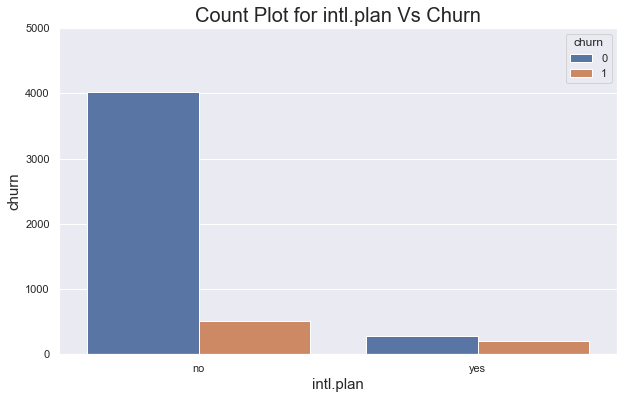

In [78]:
# Analyzing by using countplot
plt.figure(figsize=(10,6))
sns.countplot(x='intl.plan', hue = "churn",data=df2)
plt.xlabel("intl.plan",fontsize=15)
plt.ylabel("churn",fontsize=15)
plt.ylim(0,5000)
plt.title("Count Plot for intl.plan Vs Churn",fontsize=20)

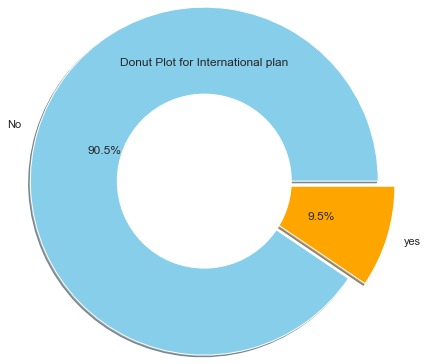

In [79]:
# To get the Donut Plot to analyze International plan

plt.rcParams['figure.figsize']=(4,4)
data = df['intl.plan'].value_counts()
explode = (0,0.2)
plt.pie(data, explode = explode, autopct='%1.1f%%', shadow=True,radius = 2.0, labels = ['No','yes'],colors=['skyblue','orange'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for International plan')
plt.show()

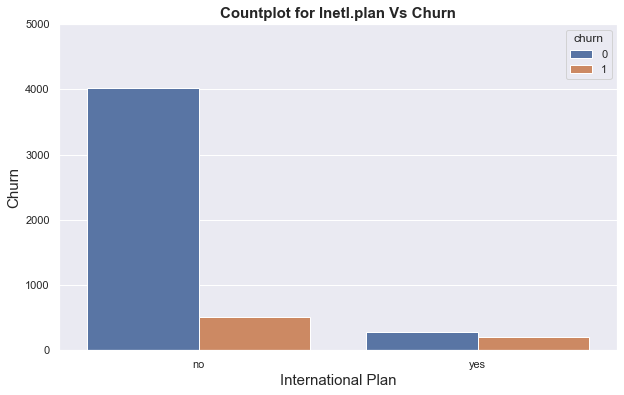

In [80]:
# Analyzing by using countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='intl.plan', hue='churn',data = df2)
plt.xlabel('International Plan',fontsize=15)
plt.ylabel('Churn',fontsize=15)
plt.ylim(0,5000)
plt.title('Countplot for Inetl.plan Vs Churn',fontweight='bold',fontsize=15)
plt.show()

from the above data we get,
There are 4527 customers who dont have a international plan.
There are 473 customers who have a international plan.
Among those who have a international plan 42.07 % people churn.
whereas among those who dont have a international plan 11.2 % people churn.
So, basically the people who bought international plans are churning in a big numbers.
Probably, because of connectivity issues or high call charge.

In [81]:
df2["intl.plan"].value_counts()

no     4527
yes     473
Name: intl.plan, dtype: int64

# Analyzing "Voice.Plan" column

In [82]:
#Show the unique value of the "Voice mail plan" column
df2["voice.plan"].unique()

array(['yes', 'no'], dtype=object)

In [83]:
# Calculate the voice mail plan vs churn percentage
voice_mail_plan_data = pd.crosstab(df2['voice.plan'],df2['churn'])
voice_mail_plan_data['Percentage Churn'] = voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(voice_mail_plan_data)

churn          0    1  Percentage Churn
voice.plan                             
no          3072  605         16.453631
yes         1221  102          7.709751


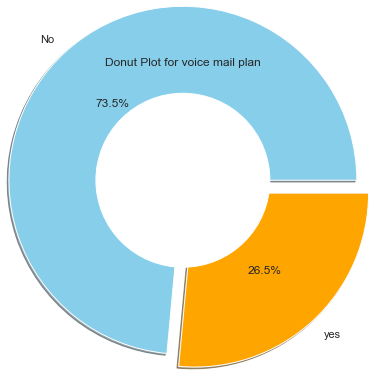

In [84]:
# To get the Donut Plot to analyze voice mail plan
plt.rcParams['figure.figsize'] = (4,4)
data = df2['voice.plan'].value_counts()
explode = (0,0.2)
plt.pie(data, explode = explode, autopct='%1.1f%%', shadow=True,radius = 2.0, labels = ['No','yes'],colors=['skyblue','orange'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for voice mail plan')
plt.show()

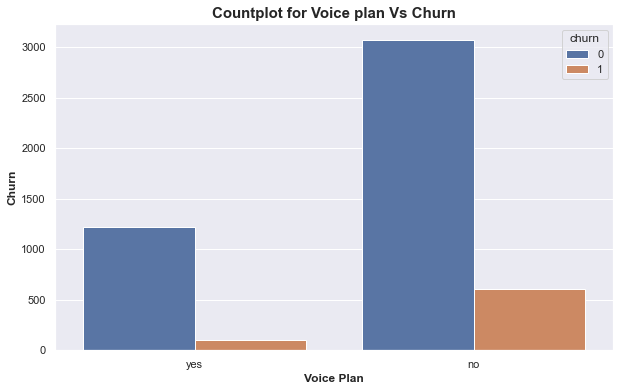

In [85]:
# Analyzing by using countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='voice.plan', hue='churn',data = df2)
plt.figsize=(20,5)
plt.xlabel('Voice Plan',fontweight='bold')
plt.ylabel('Churn',fontweight='bold')
plt.title('Countplot for Voice plan Vs Churn',fontweight='bold',fontsize=15)
plt.show()

As we can see there are no clear relation between voice mail plan and churn so we can't clearly say anything so let's move to the next voice mail feature i.e number of voice mail, let's see what it gives to us.

# Analyzing "voice messages" column

In [86]:
#Show the unique value of the "Voice mail plan" column
df2["voice.messages"].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9,  6, 52],
      dtype=int64)

In [87]:
# Printing the data of 'voice messages'
df2['voice.messages'].value_counts()

0     3678
31      83
28      67
29      67
33      66
24      64
27      64
30      58
26      58
32      57
23      52
25      51
22      47
36      45
37      43
39      42
34      41
35      41
21      41
38      41
20      32
40      28
19      27
41      22
17      21
42      19
18      18
16      17
43      16
15      13
45      11
12      11
14       9
44       9
46       8
48       5
13       4
47       4
10       4
49       3
6        2
9        2
50       2
11       2
8        2
4        1
51       1
52       1
Name: voice.messages, dtype: int64

In [88]:
# Showing the details of 'voice.messages'
df2['voice.messages'].describe()

count    5000.000000
mean        7.755200
std        13.546393
min         0.000000
25%         0.000000
50%         0.000000
75%        17.000000
max        52.000000
Name: voice.messages, dtype: float64

Text(0, 0.5, 'Density')

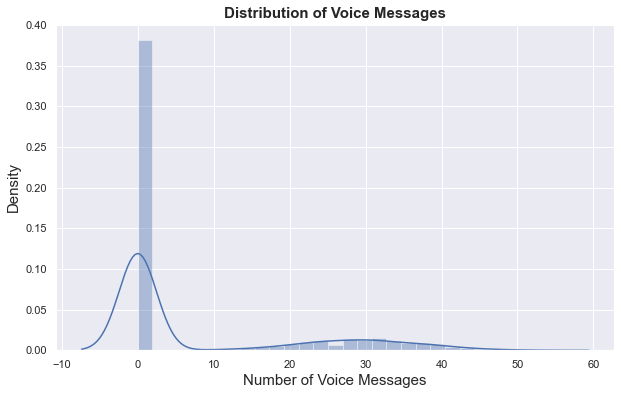

In [89]:
# Analyzing by using distplot
plt.figure(figsize=(10,6))
sns.distplot(df2['voice.messages'])

plt.title('Distribution of Voice Messages',fontweight='bold',fontsize=15)
plt.xlabel('Number of Voice Messages',fontsize=15)
plt.ylabel('Density',fontsize=15)

After analyzing the above mail feature data we get an insight that when there are more than 20 voice messages then there is a churn. For that, we need to improve the voice mail quality. 

# Analyzing "Customer service calls" column

In [ ]:
#Printing tha data of customer service calls
df2['customer.calls'].value_counts()

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: customer.calls, dtype: int64

In [ ]:
# Calculating the customer calls vs churn percentage
customer_calls_data = pd.crosstab(df2['customer.calls'],df2['churn'])
customer_calls_data['customer.calls'] = customer_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(customer_calls_data)

churn              0    1  customer.calls
customer.calls                           
0                902  121       11.827957
1               1596  190       10.638298
2               1005  122       10.825200
3                592   73       10.977444
4                141  111       44.047619
5                 38   58       60.416667
6                 12   22       64.705882
7                  6    7       53.846154
8                  1    1       50.000000
9                  0    2      100.000000


Text(0, 0.5, 'Churn')

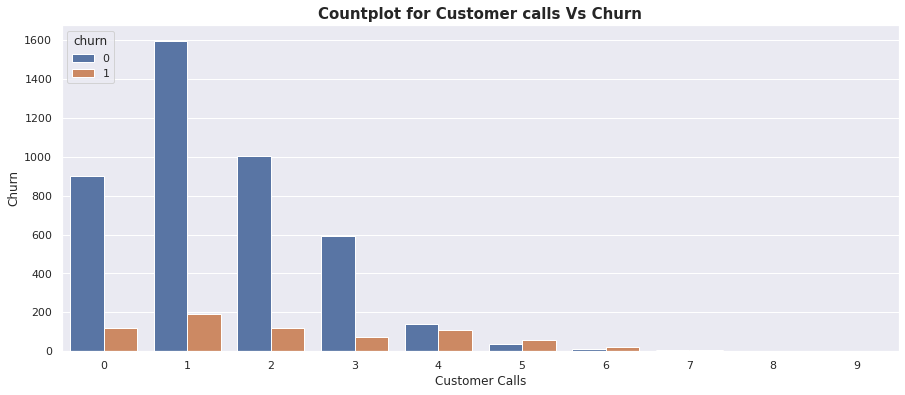

In [ ]:
# Analyzing by using countplot

plt.figure(figsize=(15,6))
sns.countplot(x='customer.calls', hue='churn',data = df2)
plt.title('Countplot for Customer calls Vs Churn', fontweight='bold',fontsize=15)
plt.xlabel('Customer Calls')
plt.ylabel('Churn')

In [92]:
high_call_customers = df1[df1['customer.calls'] > 4]
print(high_call_customers['account.length'])
#high_call_customers

21       77
48      119
54       87
136      75
154      96
       ... 
4778    102
4790    141
4831     56
4919     77
4982     86
Name: account.length, Length: 147, dtype: int64


In [93]:
high_call_customers.shape

(147, 20)

-Based on ther analysis of customers who made more than 4 calls,suggestions for reducing churn include identifying and addressing specific issues, offering additional support or incentives to retain business, implementing regular check-ins,and improving overall customer service and support.

In [94]:
corr = df1.corr()
corr

account.length  voice.messages  intl.mins  intl.calls  \
account.length        1.000000       -0.014575   0.001291    0.014277   
voice.messages       -0.014575        1.000000   0.002463    0.000124   
intl.mins             0.001291        0.002463   1.000000    0.016791   
intl.calls            0.014277        0.000124   0.016791    1.000000   
intl.charge           0.001292        0.002505   0.999993    0.016900   
day.mins             -0.001017        0.005381  -0.019486   -0.001303   
day.calls             0.028240        0.000883   0.013097    0.010893   
eve.calls             0.009143       -0.003954  -0.007458    0.005574   
eve.charge           -0.009587        0.019496   0.000132    0.008393   
night.mins            0.000668        0.005541  -0.006721   -0.017214   
night.calls          -0.007825        0.002676   0.000391   -0.000156   
night.charge          0.000656        0.005535  -0.006717   -0.017182   
customer.calls       -0.001445       -0.007086  -0.012122   -0.019147   
churn                 0.021203       -0.097633   0.063285   -0.046893   

                intl.charge  day.mins  day.calls  eve.calls  eve.charge  \
account.length     0.001292 -0.001017   0.028240   0.009143   -0.009587   
voice.messages     0.002505  0.005381   0.000883  -0.003954    0.019496   
intl.mins          0.999993 -0.019486   0.013097  -0.007458    0.000132   
intl.calls         0.016900 -0.001303   0.010893   0.005574    0.008393   
intl.charge        1.000000 -0.019415   0.013161  -0.007507    0.000155   
day.mins          -0.019415  1.000000   0.001935   0.008128   -0.010760   
day.calls          0.013161  0.001935   1.000000   0.003754   -0.000695   
eve.calls         -0.007507  0.008128   0.003754   1.000000    0.002778   
eve.charge         0.000155 -0.010760  -0.000695   0.002778    1.000000   
night.mins        -0.006655  0.011799   0.002804   0.001781   -0.016649   
night.calls        0.000368  0.004236  -0.008308  -0.013682    0.013422   
night.charge      -0.006650  0.011783   0.002802   0.001799   -0.016652   
customer.calls    -0.012180  0.002733  -0.010739   0.006235   -0.013836   
churn              0.063275  0.207705   0.016130  -0.006284    0.089282   

                night.mins  night.calls  night.charge  customer.calls  \
account.length    0.000668    -0.007825      0.000656       -0.001445   
voice.messages    0.005541     0.002676      0.005535       -0.007086   
intl.mins        -0.006721     0.000391     -0.006717       -0.012122   
intl.calls       -0.017214    -0.000156     -0.017182       -0.019147   
intl.charge      -0.006655     0.000368     -0.006650       -0.012180   
day.mins          0.011799     0.004236      0.011783        0.002733   
day.calls         0.002804    -0.008308      0.002802       -0.010739   
eve.calls         0.001781    -0.013682      0.001799        0.006235   
eve.charge       -0.016649     0.013422     -0.016652       -0.013836   
night.mins        1.000000     0.026972      0.999999       -0.008533   
night.calls       0.026972     1.000000      0.026949       -0.008283   
night.charge      0.999999     0.026949      1.000000       -0.008530   
customer.calls   -0.008533    -0.008283     -0.008530        1.000000   
churn             0.045677    -0.006986      0.045673        0.212564   

                   churn  
account.length  0.021203  
voice.messages -0.097633  
intl.mins       0.063285  
intl.calls     -0.046893  
intl.charge     0.063275  
day.mins        0.207705  
day.calls       0.016130  
eve.calls      -0.006284  
eve.charge      0.089282  
night.mins      0.045677  
night.calls    -0.006986  
night.charge    0.045673  
customer.calls  0.212564  
churn           1.000000

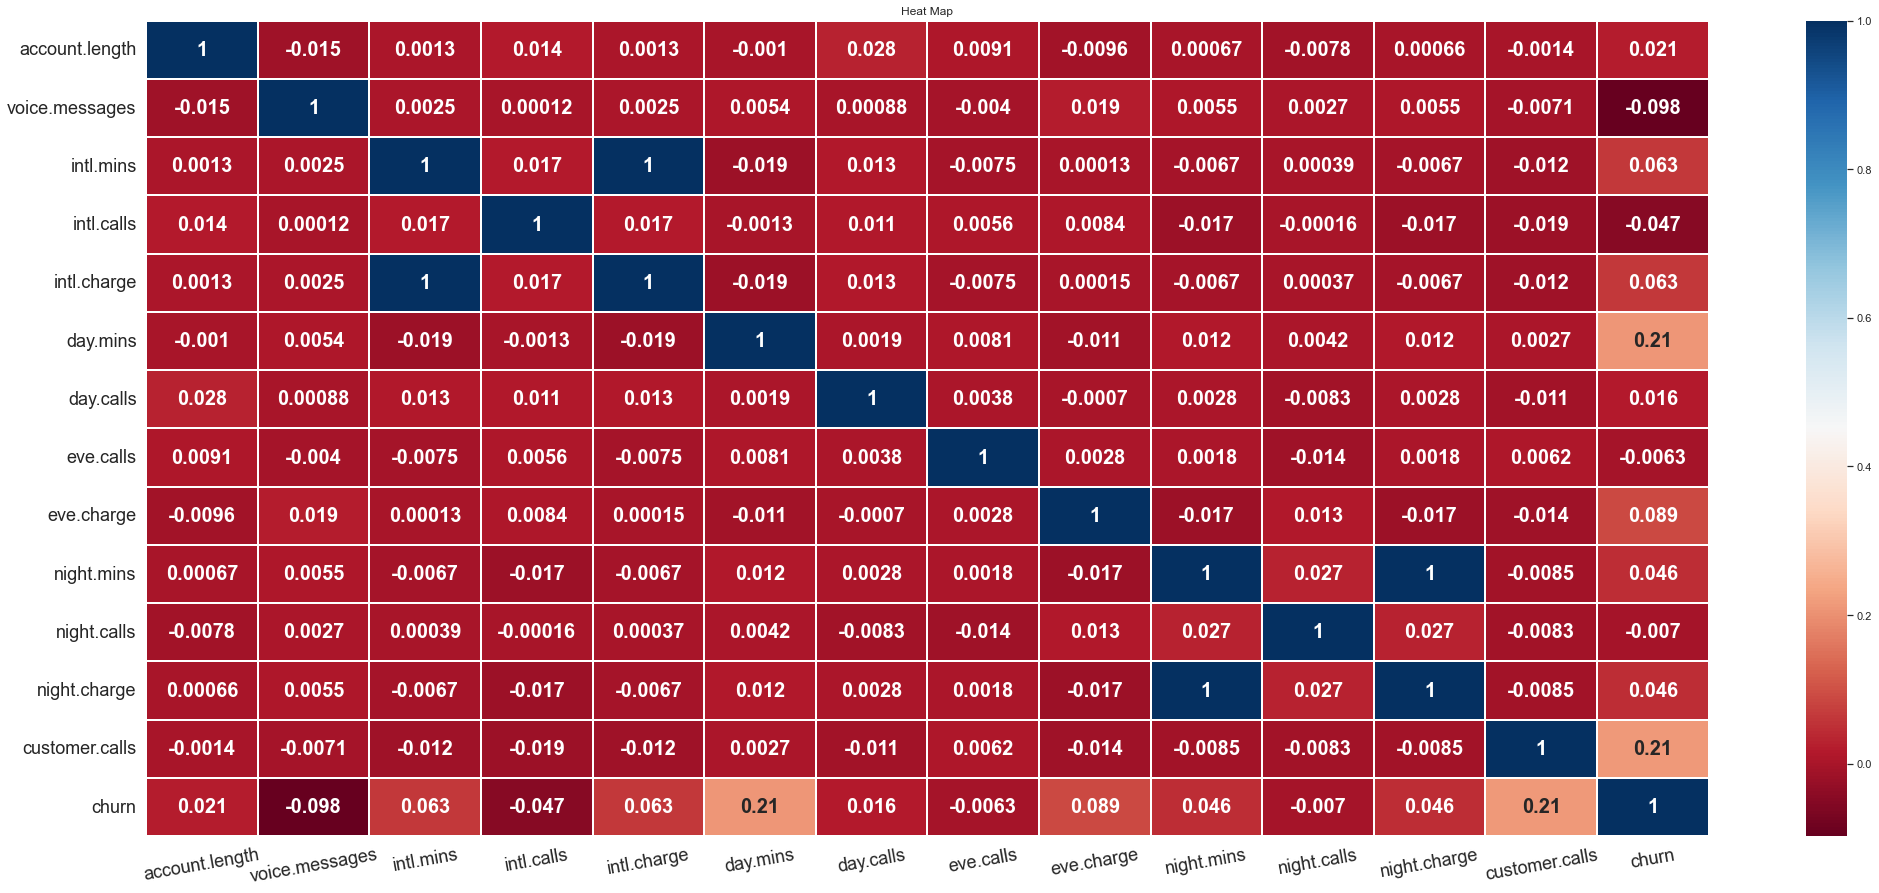

In [95]:
f, ax = plt.subplots(figsize=(35,15))
sns.heatmap(corr,cmap='RdBu', annot = True,linewidths=0.3,ax=ax,annot_kws = {'fontsize':20,'fontweight':'bold'})
plt.title('Heat Map')
plt.yticks(rotation=0,fontsize=18)
plt.xticks(rotation=10,fontsize=18)
plt.show()

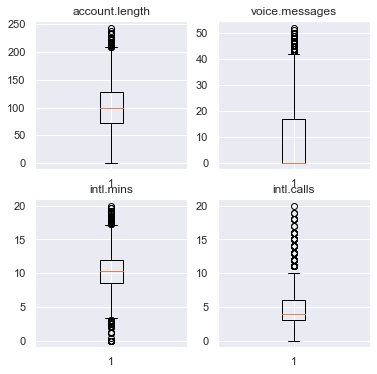

In [96]:
plt.subplots(figsize=(6,6))
plt.subplot(221)
plt.boxplot(df1['account.length'])
plt.title("account.length")
plt.subplot(222)
plt.boxplot(df1["voice.messages"])
plt.title("voice.messages")
plt.subplot(223)
plt.boxplot(df1["intl.mins"])
plt.title("intl.mins")
plt.subplot(224)
plt.boxplot(df1["intl.calls"])
plt.title("intl.calls")
plt.show()

Text(0.5, 1.0, 'day.calls')

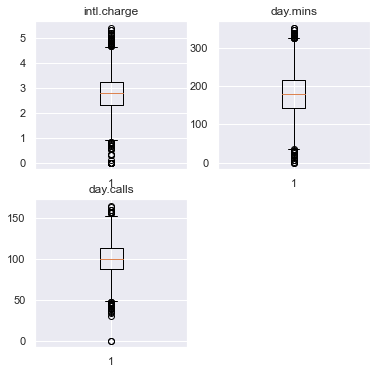

In [97]:
plt.subplots(figsize=(6,6))
plt.subplot(221)
plt.boxplot(df1["intl.charge"])
plt.title("intl.charge")
plt.subplot(222)
plt.boxplot(df1["day.mins"])
plt.title("day.mins")
plt.subplot(223)
plt.boxplot(df1["day.calls"])
plt.title("day.calls")


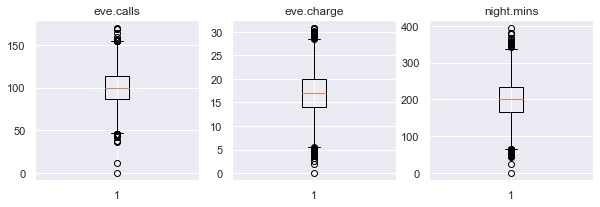

In [98]:
plt.subplots(figsize=(10,10))

plt.subplot(331)
plt.boxplot(df1["eve.calls"])
plt.title("eve.calls")
plt.subplot(332)
plt.boxplot(df1["eve.charge"])
plt.title("eve.charge")
plt.subplot(333)
plt.boxplot(df1["night.mins"])
plt.title("night.mins")
plt.show()

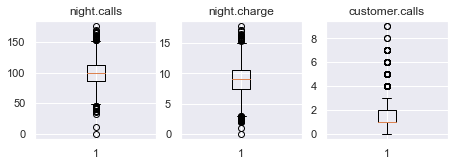

In [99]:
plt.subplots(figsize=(10,10))
plt.subplot(441)
plt.boxplot(df1["night.calls"])
plt.title("night.calls")
plt.subplot(442)
plt.boxplot(df1["night.charge"])
plt.title("night.charge")
plt.subplot(443)
plt.boxplot(df1["customer.calls"])
plt.title("customer.calls")
plt.show()

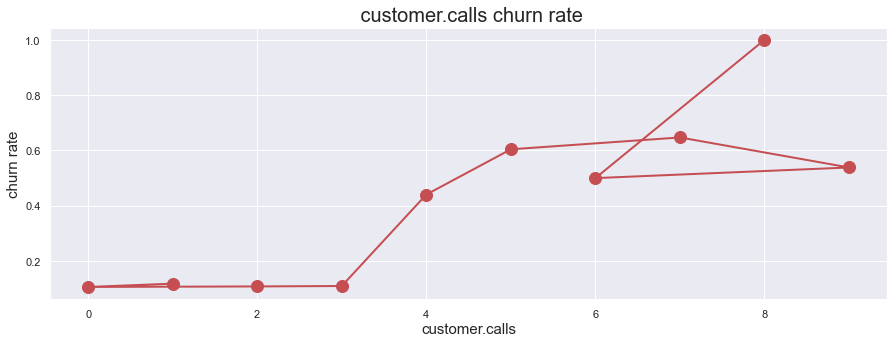

In [100]:
plt.figure(figsize=(15,5))
s1=df1['customer.calls'].unique()
s2=df1.groupby(['customer.calls'])['churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(s1, s2, color='r', marker ='o', linewidth=2, markersize=12)

plt.title(" customer.calls churn rate", fontsize = 20)
plt.xlabel('customer.calls', fontsize = 15)

plt.ylabel('churn rate', fontsize = 15) 
plt.show()

# Feature engineering

In [101]:
df2=pd.get_dummies(df1,columns=["voice.plan","intl.plan"],drop_first=True)

In [102]:
df2

state      area.code  account.length  voice.messages  intl.mins  \
0       KS  area_code_415             128              25       10.0   
1       OH  area_code_415             107              26       13.7   
2       NJ  area_code_415             137               0       12.2   
3       OH  area_code_408              84               0        6.6   
4       OK  area_code_415              75               0       10.1   
...    ...            ...             ...             ...        ...   
4995    HI  area_code_408              50              40        9.9   
4996    WV  area_code_415             152               0       14.7   
4997    DC  area_code_415              61               0       13.6   
4998    DC  area_code_510             109               0        8.5   
4999    VT  area_code_415              86              34        9.3   

      intl.calls  intl.charge  day.mins  day.calls day.charge eve.mins  \
0              3         2.70     265.1        110      45.07    197.4   
1              3         3.70     161.6        123      27.47    195.5   
2              5         3.29     243.4        114      41.38    121.2   
3              7         1.78     299.4         71       50.9     61.9   
4              3         2.73     166.7        113      28.34    148.3   
...          ...          ...       ...        ...        ...      ...   
4995           5         2.67     235.7        127      40.07      223   
4996           2         3.97     184.2         90      31.31    256.8   
4997           4         3.67     140.6         89       23.9    172.8   
4998           6         2.30     188.8         67       32.1    171.7   
4999          16         2.51     129.4        102         22    267.1   

      eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4995        126       18.96       297.5          116         13.39   
4996         73       21.83       213.6          113          9.61   
4997        128       14.69       212.4           97          9.56   
4998         92       14.59       224.4           89         10.10   
4999        104       22.70       154.8          100          6.97   

      customer.calls  churn  voice.plan_yes  intl.plan_yes  
0                  1      0               1              0  
1                  1      0               1              0  
2                  0      0               0              0  
3                  2      0               0              1  
4                  3      0               0              1  
...              ...    ...             ...            ...  
4995               2      0               1              0  
4996               3      1               0              0  
4997               1      0               0              0  
4998               0      0               0              0  
4999               0      0               1              0  

[5000 rows x 20 columns]

In [103]:
df3=df2.drop(["state","area.code"],axis=1)
df3

account.length  voice.messages  intl.mins  intl.calls  intl.charge  \
0                128              25       10.0           3         2.70   
1                107              26       13.7           3         3.70   
2                137               0       12.2           5         3.29   
3                 84               0        6.6           7         1.78   
4                 75               0       10.1           3         2.73   
...              ...             ...        ...         ...          ...   
4995              50              40        9.9           5         2.67   
4996             152               0       14.7           2         3.97   
4997              61               0       13.6           4         3.67   
4998             109               0        8.5           6         2.30   
4999              86              34        9.3          16         2.51   

      day.mins  day.calls day.charge eve.mins  eve.calls  eve.charge  \
0        265.1        110      45.07    197.4         99       16.78   
1        161.6        123      27.47    195.5        103       16.62   
2        243.4        114      41.38    121.2        110       10.30   
3        299.4         71       50.9     61.9         88        5.26   
4        166.7        113      28.34    148.3        122       12.61   
...        ...        ...        ...      ...        ...         ...   
4995     235.7        127      40.07      223        126       18.96   
4996     184.2         90      31.31    256.8         73       21.83   
4997     140.6         89       23.9    172.8        128       14.69   
4998     188.8         67       32.1    171.7         92       14.59   
4999     129.4        102         22    267.1        104       22.70   

      night.mins  night.calls  night.charge  customer.calls  churn  \
0          244.7           91         11.01               1      0   
1          254.4          103         11.45               1      0   
2          162.6          104          7.32               0      0   
3          196.9           89          8.86               2      0   
4          186.9          121          8.41               3      0   
...          ...          ...           ...             ...    ...   
4995       297.5          116         13.39               2      0   
4996       213.6          113          9.61               3      1   
4997       212.4           97          9.56               1      0   
4998       224.4           89         10.10               0      0   
4999       154.8          100          6.97               0      0   

      voice.plan_yes  intl.plan_yes  
0                  1              0  
1                  1              0  
2                  0              0  
3                  0              1  
4                  0              1  
...              ...            ...  
4995               1              0  
4996               0              0  
4997               0              0  
4998               0              0  
4999               1              0  

[5000 rows x 18 columns]

In [104]:
df4=df3.rename(columns={"area.code":"area_code","account.length":"account_length","voice.plan":"voice_plan","voice.messages":"voice_message","intl.plan":"intl_plan","intl.mins":"intl_mins",
                   "intl.calls":"intl_calls","intl.charge":"intl_charge","day.mins":"day_mins","day.calls":"day_calls","day.charge":"day_charge",
                   "eve.mins":"eve_mins","eve.calls":"eve_calls","eve.charge":"eve_charge","night.mins":"night_mins","night.calls":"night_calls",
                   "night.charge":"night_charge","night.charge":"night_charge","customer.calls":"customer_calls"})

In [105]:
df4.head()

account_length  voice_message  intl_mins  intl_calls  intl_charge  \
0             128             25       10.0           3         2.70   
1             107             26       13.7           3         3.70   
2             137              0       12.2           5         3.29   
3              84              0        6.6           7         1.78   
4              75              0       10.1           3         2.73   

   day_mins  day_calls day_charge eve_mins  eve_calls  eve_charge  night_mins  \
0     265.1        110      45.07    197.4         99       16.78       244.7   
1     161.6        123      27.47    195.5        103       16.62       254.4   
2     243.4        114      41.38    121.2        110       10.30       162.6   
3     299.4         71       50.9     61.9         88        5.26       196.9   
4     166.7        113      28.34    148.3        122       12.61       186.9   

   night_calls  night_charge  customer_calls  churn  voice.plan_yes  \
0           91         11.01               1      0               1   
1          103         11.45               1      0               1   
2          104          7.32               0      0               0   
3           89          8.86               2      0               0   
4          121          8.41               3      0               0   

   intl.plan_yes  
0              0  
1              0  
2              0  
3              1  
4              1

In [106]:
df4.dtypes

account_length      int64
voice_message       int64
intl_mins         float64
intl_calls          int64
intl_charge       float64
day_mins          float64
day_calls           int64
day_charge         object
eve_mins           object
eve_calls           int64
eve_charge        float64
night_mins        float64
night_calls         int64
night_charge      float64
customer_calls      int64
churn               int64
voice.plan_yes      uint8
intl.plan_yes       uint8
dtype: object

In [107]:
df4["day.charge"]=df3["day.charge"].astype("float")
df4["eve.mins"]=df3["eve.mins"].astype("float")

In [108]:
df4.dtypes

account_length      int64
voice_message       int64
intl_mins         float64
intl_calls          int64
intl_charge       float64
day_mins          float64
day_calls           int64
day_charge         object
eve_mins           object
eve_calls           int64
eve_charge        float64
night_mins        float64
night_calls         int64
night_charge      float64
customer_calls      int64
churn               int64
voice.plan_yes      uint8
intl.plan_yes       uint8
day.charge        float64
eve.mins          float64
dtype: object

In [115]:
df4

account_length  voice_message  intl_mins  intl_calls  intl_charge  \
0                128             25       10.0           3         2.70   
1                107             26       13.7           3         3.70   
2                137              0       12.2           5         3.29   
3                 84              0        6.6           7         1.78   
4                 75              0       10.1           3         2.73   
...              ...            ...        ...         ...          ...   
4995              50             40        9.9           5         2.67   
4996             152              0       14.7           2         3.97   
4997              61              0       13.6           4         3.67   
4998             109              0        8.5           6         2.30   
4999              86             34        9.3          16         2.51   

      day_mins  day_calls day_charge eve_mins  eve_calls  eve_charge  \
0        265.1        110      45.07    197.4         99       16.78   
1        161.6        123      27.47    195.5        103       16.62   
2        243.4        114      41.38    121.2        110       10.30   
3        299.4         71       50.9     61.9         88        5.26   
4        166.7        113      28.34    148.3        122       12.61   
...        ...        ...        ...      ...        ...         ...   
4995     235.7        127      40.07      223        126       18.96   
4996     184.2         90      31.31    256.8         73       21.83   
4997     140.6         89       23.9    172.8        128       14.69   
4998     188.8         67       32.1    171.7         92       14.59   
4999     129.4        102         22    267.1        104       22.70   

      night_mins  night_calls  night_charge  customer_calls  churn  \
0          244.7           91         11.01               1      0   
1          254.4          103         11.45               1      0   
2          162.6          104          7.32               0      0   
3          196.9           89          8.86               2      0   
4          186.9          121          8.41               3      0   
...          ...          ...           ...             ...    ...   
4995       297.5          116         13.39               2      0   
4996       213.6          113          9.61               3      1   
4997       212.4           97          9.56               1      0   
4998       224.4           89         10.10               0      0   
4999       154.8          100          6.97               0      0   

      voice.plan_yes  intl.plan_yes  day.charge  eve.mins  
0                  1              0       45.07     197.4  
1                  1              0       27.47     195.5  
2                  0              0       41.38     121.2  
3                  0              1       50.90      61.9  
4                  0              1       28.34     148.3  
...              ...            ...         ...       ...  
4995               1              0       40.07     223.0  
4996               0              0       31.31     256.8  
4997               0              0       23.90     172.8  
4998               0              0       32.10     171.7  
4999               1              0       22.00     267.1  

[4969 rows x 20 columns]

In [113]:
from sklearn.preprocessing import LabelEncoder 
LE=LabelEncoder()
df4["churn"]=LE.fit_transform(df4["churn"])

In [114]:
df4.shape

(4969, 20)